In [1]:
import copy, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("D:\L-4 T-1\ML\Lab\Multi varient regression model\property_listing_data_in_Bangladesh.csv")
df

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand
...,...,...,...,...,...,...,...,...,...,...,...
7552,"Picture Yourself, Residing In This Well Constr...",4,4,"3,600 sqft","Sector 3, Uttara, Dhaka",Duplex,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",80 Thousand
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900 sqft,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 9, 2022",19 Thousand
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,"1,000 sqft","Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,"February 14, 2022",22 Thousand
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,"3,600 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",1.75 Lakh


In [3]:
df.shape
df= df.loc[df["type"] != "Building"]
df.shape
df= df.loc[df["type"] != "Duplex"]
df.shape
df

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand
...,...,...,...,...,...,...,...,...,...,...,...
7551,Nicely Planned Flat Of 1888 Sq Ft In Bashundha...,3,4,"1,888 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"March 6, 2020",50 Thousand
7553,Flat For Rent In Uttara Sector 13 Near Lubana ...,3,2,900 sqft,"Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/15...,https://www.bproperty.com/en/property/details-...,"February 9, 2022",19 Thousand
7554,1000 SQ FT flat for rent in Uttara Sector 13 n...,2,2,"1,000 sqft","Sector 13, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/12...,https://www.bproperty.com/en/property/details-...,"February 14, 2022",22 Thousand
7555,Well Planned Apartment For Rent In Gulshan 1 N...,3,4,"3,600 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/30...,https://www.bproperty.com/en/property/details-...,"February 7, 2023",1.75 Lakh


In [4]:
df= df.drop(columns = ["title", "adress", "type", "purpose","flooPlan", "url", "lastUpdated"])
df

,beds,bath,area,price
0,3,4,"2,200 sqft",50 Thousand
1,3,4,"1,400 sqft",30 Thousand
2,3,4,"1,950 sqft",30 Thousand
3,3,3,"2,000 sqft",35 Thousand
4,3,4,"1,650 sqft",25 Thousand
...,...,...,...,...
7551,3,4,"1,888 sqft",50 Thousand
7553,3,2,900 sqft,19 Thousand
7554,2,2,"1,000 sqft",22 Thousand
7555,3,4,"3,600 sqft",1.75 Lakh


In [5]:
row_index = 28
row_loc = df.loc[row_index]
print("Row at index", row_index, "using .loc:\n", row_loc)

Row at index 28 using .loc:
 beds           1 Bed
bath          1 Bath
area        550 sqft
price    12 Thousand
Name: 28, dtype: object


In [6]:

# Remove unwanted terms from columns
df['beds'] = df['beds'].str.replace('Bed', '')
df['bath'] = df['bath'].str.replace('Bath', '')
df['area'] = df['area'].str.replace(' sqft', '').str.replace(',', '')
df['price'] = df['price'].str.replace(',', '')

# Convert numeric columns to appropriate data types
df['beds'] = pd.to_numeric(df['beds'])
df['bath'] = pd.to_numeric(df['bath'])
df['area'] = pd.to_numeric(df['area'])

def convert_price(price):
    if 'Thousand' in price:
        return int(float(price.replace(' Thousand', '')) * 1000)
    elif 'Lakh' in price:
        return int(float(price.replace(' Lakh', '')) * 100000)
    else:
        return int(price)
df['price'] = df['price'].apply(convert_price)


print(df)


      beds  bath  area   price
0        3     4  2200   50000
1        3     4  1400   30000
2        3     4  1950   30000
3        3     3  2000   35000
4        3     4  1650   25000
...    ...   ...   ...     ...
7551     3     4  1888   50000
7553     3     2   900   19000
7554     2     2  1000   22000
7555     3     4  3600  175000
7556     4     4  2600   90000

[7489 rows x 4 columns]


In [7]:
row_index = 28
row_loc = df.loc[row_index]
print("Row at index", row_index, "using .loc:\n", row_loc)

Row at index 28 using .loc:
 beds         1
bath         1
area       550
price    12000
Name: 28, dtype: int64


In [8]:
numeric_cols = ['beds', 'bath', 'area']
df[numeric_cols] = df[numeric_cols].replace(',', '', regex=True)
df[numeric_cols] = df[numeric_cols].astype(float)
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())

df

,beds,bath,area,price
0,0.4,0.6,0.283582,50000
1,0.4,0.6,0.164179,30000
2,0.4,0.6,0.246269,30000
3,0.4,0.4,0.253731,35000
4,0.4,0.6,0.201493,25000
...,...,...,...,...
7551,0.4,0.6,0.237015,50000
7553,0.4,0.2,0.089552,19000
7554,0.2,0.2,0.104478,22000
7555,0.4,0.6,0.492537,175000


In [9]:
X= df.iloc[:, :3].values

Y= df.iloc[:, -1].values

print(X,X.shape)
print(Y,Y.shape)


[[0.4        0.6        0.28358209]
 [0.4        0.6        0.1641791 ]
 [0.4        0.6        0.24626866]
 ...
 [0.2        0.2        0.10447761]
 [0.4        0.6        0.49253731]
 [0.6        0.6        0.34328358]] (7489, 3)
[ 50000  30000  30000 ...  22000 175000  90000] (7489,)


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

print(X_train,X_train.shape)
print(Y_train,Y_train.shape)


[[0.4        0.4        0.10447761]
 [0.4        0.4        0.13432836]
 [0.4        0.6        0.20208955]
 ...
 [0.4        0.4        0.19402985]
 [0.4        0.4        0.14179104]
 [0.4        0.2        0.11940299]] (4493, 3)
[14000 23000 15000 ... 25000 22000 15000] (4493,)


In [11]:
b_init = -30675.592477186736 
w_init = np.array([ -12677.84705097, -13126.85662141,  -7611.13687295])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (3,), b_init type: <class 'float'>


In [12]:
def compute_cost(X, y, w, b): 
    
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2      
    cost = cost / (2 * m)
    return cost


# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, Y_train, w_init, b_init)
print(f'{w_init},{ b_init}')
print(f'Cost at optimal w : {cost}')

[-12677.84705097 -13126.85662141  -7611.13687295],-30675.592477186736
Cost at optimal w : 3512210444.0707297


In [13]:
def compute_gradient(X, y, w, b): 
    
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw


#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, Y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -71203.42310496932
dj_dw at initial w,b: 
 [-27025.07843876 -27210.22309825 -14072.24864033]


In [14]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing


# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, Y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {Y_train[i]}")

Iteration    0: Cost 1350669249.18   
Iteration  100: Cost 1350602655.21   
Iteration  200: Cost 1350536069.54   
Iteration  300: Cost 1350469492.16   
Iteration  400: Cost 1350402923.07   
Iteration  500: Cost 1350336362.27   
Iteration  600: Cost 1350269809.77   
Iteration  700: Cost 1350203265.56   
Iteration  800: Cost 1350136729.63   
Iteration  900: Cost 1350070201.99   
b,w found by gradient descent: 15.33,[6.33713229 6.56167002 3.80476177] 
prediction: 20.89, target value: 14000
prediction: 21.00, target value: 23000
prediction: 22.57, target value: 15000
prediction: 18.25, target value: 12000
prediction: 21.03, target value: 15000
prediction: 21.12, target value: 30000
prediction: 19.69, target value: 27000
prediction: 19.69, target value: 21000
prediction: 19.46, target value: 10000
prediction: 25.33, target value: 40000
prediction: 21.63, target value: 60000
prediction: 21.63, target value: 130000
prediction: 21.12, target value: 22000
prediction: 21.00, target value: 18000


In [15]:

# validation loss
cost_val = compute_cost(X_val, Y_val, w_final, b_final)
print(f"Validation Loss: {cost_val}")

# test loss
cost_test = compute_cost(X_test, Y_test, w_final, b_final)
print(f"Test Loss: {cost_test}")

# Plot the cost history on the training set
plt.plot(range(1, iterations + 1), J_hist_train)
plt.plot(range(1, iterations + 1), J_hist_val, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Loss AND Validation Loss')
plt.show()

Validation Loss: 1715599724.3310132
Test Loss: 1253227110.9215524


NameError: name 'J_hist_train' is not defined

In [16]:

predictions_test = np.dot(X_test, w_final) + b_final

#mean squared error 
mse_test = np.mean((predictions_test - Y_test) ** 2)/10000000
print(f"Mean Squared Error on Test Set: {mse_test}")


cost= compute_cost(X_test, Y_test, w_final, b_final)
cost

Mean Squared Error on Test Set: 250.64542218431023


1253227110.9215524

Loss = 1350669913.825281 , Validation =1716325349.0492153
Loss = 1350669912.4933176 , Validation =1716325347.5970953
Loss = 1350669911.1613538 , Validation =1716325346.1449752
Loss = 1350669909.8293905 , Validation =1716325344.6928551
Loss = 1350669908.497427 , Validation =1716325343.240735
Loss = 1350669907.1654632 , Validation =1716325341.7886152
Loss = 1350669905.8334997 , Validation =1716325340.3364952
Loss = 1350669904.5015364 , Validation =1716325338.884375
Loss = 1350669903.1695728 , Validation =1716325337.4322553
Loss = 1350669901.8376093 , Validation =1716325335.9801357
Loss = 1350669900.505646 , Validation =1716325334.5280151
Loss = 1350669899.1736822 , Validation =1716325333.0758955
Loss = 1350669897.8417187 , Validation =1716325331.6237757
Loss = 1350669896.5097554 , Validation =1716325330.171656
Loss = 1350669895.1777918 , Validation =1716325328.7195358
Loss = 1350669893.8458283 , Validation =1716325327.2674158
Loss = 1350669892.5138648 , Validation =1716325325.8152957
Los

Loss = 1350669579.5025353 , Validation =1716324984.567207
Loss = 1350669578.1705725 , Validation =1716324983.115088
Loss = 1350669576.8386102 , Validation =1716324981.6629694
Loss = 1350669575.5066473 , Validation =1716324980.2108498
Loss = 1350669574.1746845 , Validation =1716324978.7587306
Loss = 1350669572.8427217 , Validation =1716324977.306612
Loss = 1350669571.510759 , Validation =1716324975.8544924
Loss = 1350669570.1787963 , Validation =1716324974.4023733
Loss = 1350669568.8468337 , Validation =1716324972.9502547
Loss = 1350669567.5148711 , Validation =1716324971.4981356
Loss = 1350669566.1829083 , Validation =1716324970.0460165
Loss = 1350669564.8509457 , Validation =1716324968.593897
Loss = 1350669563.5189831 , Validation =1716324967.141778
Loss = 1350669562.1870205 , Validation =1716324965.689659
Loss = 1350669560.8550577 , Validation =1716324964.23754
Loss = 1350669559.523095 , Validation =1716324962.785421
Loss = 1350669558.1911323 , Validation =1716324961.3333018
Loss = 1

Loss = 1350669249.1758845 , Validation =1716324624.4417727
Loss = 1350669247.8439226 , Validation =1716324622.9896548
Loss = 1350669246.511961 , Validation =1716324621.5375364
Loss = 1350669245.1799989 , Validation =1716324620.085418
Loss = 1350669243.848037 , Validation =1716324618.6332998
Loss = 1350669242.516075 , Validation =1716324617.1811817
Loss = 1350669241.1841133 , Validation =1716324615.7290633
Loss = 1350669239.8521516 , Validation =1716324614.2769454
Loss = 1350669238.5201893 , Validation =1716324612.8248267
Loss = 1350669237.1882277 , Validation =1716324611.3727088
Loss = 1350669235.8562658 , Validation =1716324609.9205904
Loss = 1350669234.524304 , Validation =1716324608.4684722
Loss = 1350669233.192342 , Validation =1716324607.0163538
Loss = 1350669231.8603802 , Validation =1716324605.5642357
Loss = 1350669230.5284183 , Validation =1716324604.1121175
Loss = 1350669229.1964564 , Validation =1716324602.6599991
Loss = 1350669227.8644948 , Validation =1716324601.2078815
Los

Loss = 1350668884.218451 , Validation =1716324226.561501
Loss = 1350668882.88649 , Validation =1716324225.1093836
Loss = 1350668881.554529 , Validation =1716324223.6572664
Loss = 1350668880.222568 , Validation =1716324222.2051492
Loss = 1350668878.890607 , Validation =1716324220.7530317
Loss = 1350668877.5586462 , Validation =1716324219.3009145
Loss = 1350668876.2266853 , Validation =1716324217.848797
Loss = 1350668874.8947244 , Validation =1716324216.3966799
Loss = 1350668873.5627632 , Validation =1716324214.9445624
Loss = 1350668872.230802 , Validation =1716324213.4924452
Loss = 1350668870.8988414 , Validation =1716324212.0403278
Loss = 1350668869.5668802 , Validation =1716324210.5882108
Loss = 1350668868.2349198 , Validation =1716324209.1360936
Loss = 1350668866.9029586 , Validation =1716324207.6839764
Loss = 1350668865.5709975 , Validation =1716324206.2318592
Loss = 1350668864.2390368 , Validation =1716324204.7797422
Loss = 1350668862.9070754 , Validation =1716324203.3276246
Loss =

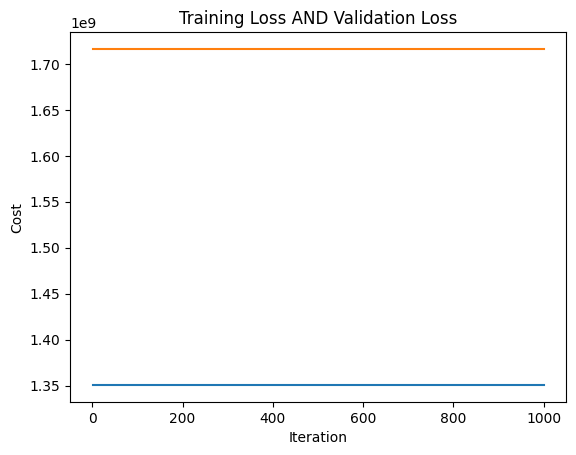

In [17]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = np.sum((np.dot(X, w) + b - y) ** 2) / (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    dw = np.dot(X.T, (np.dot(X, w) + b - y)) / m
    db = np.sum(np.dot(X, w) + b - y) / m
    return dw, db
    

def gradient_descent(X, y, w_in, b_in,alpha, num_iters):
    J_history_train = []
    J_history_val = []
    w = np.copy(w_in)
    b = b_in

    for i in range(num_iters):
        dw, db = compute_gradient(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db

        cost_train = compute_cost(X, y, w, b)
        J_history_train.append(cost_train)

        cost_val = compute_cost(X_val, Y_val, w, b)
        J_history_val.append(cost_val)
        
        print(f"Loss = {cost_train} , Validation ={cost_val}")

    return w, b, J_history_train, J_history_val




# Initialize parameters
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.0

# hyperparameters
iterations = 1000
alpha = 1e-9



w_final, b_final, J_hist_train,J_hist_val = gradient_descent(X_train, Y_train, initial_w, initial_b, alpha, iterations)
print(f"W final and b final: {w_final},{b_final}")

# validation loss
cost_val = compute_cost(X_val, Y_val, w_final, b_final)
print(f"Validation Loss: {cost_val}")

# test loss
cost_test = compute_cost(X_test, Y_test, w_final, b_final)
print(f"Test Loss: {cost_test}")

# Plot the cost history on the training set
plt.plot(range(1, iterations + 1), J_hist_train)
plt.plot(range(1, iterations + 1), J_hist_val, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Training Loss AND Validation Loss')
plt.show()


In [18]:
# Define necessary functions
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

def compute_cost(X, y, weights, bias):
    m = len(y)
    predictions = predict(X, weights, bias)
    cost = np.sum((predictions - y)**2) / (2 * m)
    return cost

def gradient_descent(X, y, weights, bias, learning_rate, num_epochs, validation_data=None):
    m = len(y)
    cost_history = []
    validation_cost_history = []
    
    for epoch in range(num_epochs):
        predictions = predict(X, weights, bias)
        error = predictions - y
        
        gradient_weights = np.dot(X.T, error) / m
        gradient_bias = np.sum(error) / m
        
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)
        
        if validation_data is not None:
            X_valid, y_valid = validation_data
            validation_cost = compute_cost(X_valid, y_valid, weights, bias)
            validation_cost_history.append(validation_cost)
        
        print(f"Epoch {epoch+1}/{num_epochs} - Training Cost: {cost:.4f} - Validation Cost: {validation_cost:.4f}")
    
    return weights, bias, cost_history, validation_cost_history

# Initialize weights and bias
weights = np.zeros(3)
bias = 0

# Hyperparameters
learning_rate = 0.001
num_epochs = 1000

# Perform gradient descent
weights, bias, train_cost_history, valid_cost_history = gradient_descent(X_train, Y_train, weights, bias, learning_rate, num_epochs, validation_data=(X_val, Y_val))



Epoch 1/1000 - Training Cost: 1349338781.1853 - Validation Cost: 1714874067.0583
Epoch 2/1000 - Training Cost: 1348010961.3457 - Validation Cost: 1713426253.2427
Epoch 3/1000 - Training Cost: 1346686447.3005 - Validation Cost: 1711981900.4918
Epoch 4/1000 - Training Cost: 1345365230.7327 - Validation Cost: 1710541000.2643
Epoch 5/1000 - Training Cost: 1344047303.3462 - Validation Cost: 1709103544.0400
Epoch 6/1000 - Training Cost: 1342732656.8659 - Validation Cost: 1707669523.3200
Epoch 7/1000 - Training Cost: 1341421283.0374 - Validation Cost: 1706238929.6268
Epoch 8/1000 - Training Cost: 1340113173.6271 - Validation Cost: 1704811754.5037
Epoch 9/1000 - Training Cost: 1338808320.4221 - Validation Cost: 1703387989.5153
Epoch 10/1000 - Training Cost: 1337506715.2303 - Validation Cost: 1701967626.2472
Epoch 11/1000 - Training Cost: 1336208349.8800 - Validation Cost: 1700550656.3057
Epoch 12/1000 - Training Cost: 1334913216.2202 - Validation Cost: 1699137071.3183
Epoch 13/1000 - Training 

Epoch 327/1000 - Training Cost: 1052301330.2864 - Validation Cost: 1385806967.0167
Epoch 328/1000 - Training Cost: 1051709487.4351 - Validation Cost: 1385135630.8380
Epoch 329/1000 - Training Cost: 1051119098.9629 - Validation Cost: 1384465846.8370
Epoch 330/1000 - Training Cost: 1050530161.2120 - Validation Cost: 1383797611.2197
Epoch 331/1000 - Training Cost: 1049942670.5336 - Validation Cost: 1383130920.2015
Epoch 332/1000 - Training Cost: 1049356623.2882 - Validation Cost: 1382465770.0074
Epoch 333/1000 - Training Cost: 1048772015.8456 - Validation Cost: 1381802156.8715
Epoch 334/1000 - Training Cost: 1048188844.5846 - Validation Cost: 1381140077.0374
Epoch 335/1000 - Training Cost: 1047607105.8929 - Validation Cost: 1380479526.7579
Epoch 336/1000 - Training Cost: 1047026796.1678 - Validation Cost: 1379820502.2952
Epoch 337/1000 - Training Cost: 1046447911.8151 - Validation Cost: 1379162999.9207
Epoch 338/1000 - Training Cost: 1045870449.2501 - Validation Cost: 1378507015.9150
Epoc

Epoch 651/1000 - Training Cost: 919662978.7866 - Validation Cost: 1231848783.6866
Epoch 652/1000 - Training Cost: 919393690.4325 - Validation Cost: 1231525575.3656
Epoch 653/1000 - Training Cost: 919125045.4167 - Validation Cost: 1231203073.0953
Epoch 654/1000 - Training Cost: 918857042.1224 - Validation Cost: 1230881275.1741
Epoch 655/1000 - Training Cost: 918589678.9368 - Validation Cost: 1230560179.9044
Epoch 656/1000 - Training Cost: 918322954.2510 - Validation Cost: 1230239785.5929
Epoch 657/1000 - Training Cost: 918056866.4604 - Validation Cost: 1229920090.5506
Epoch 658/1000 - Training Cost: 917791413.9642 - Validation Cost: 1229601093.0924
Epoch 659/1000 - Training Cost: 917526595.1657 - Validation Cost: 1229282791.5375
Epoch 660/1000 - Training Cost: 917262408.4723 - Validation Cost: 1228965184.2093
Epoch 661/1000 - Training Cost: 916998852.2954 - Validation Cost: 1228648269.4351
Epoch 662/1000 - Training Cost: 916735925.0504 - Validation Cost: 1228332045.5466
Epoch 663/1000 -

Epoch 985/1000 - Training Cost: 857316836.3006 - Validation Cost: 1154515152.3876
Epoch 986/1000 - Training Cost: 857193090.7535 - Validation Cost: 1154354378.9200
Epoch 987/1000 - Training Cost: 857069622.9665 - Validation Cost: 1154193923.3425
Epoch 988/1000 - Training Cost: 856946432.2425 - Validation Cost: 1154033784.9052
Epoch 989/1000 - Training Cost: 856823517.8864 - Validation Cost: 1153873962.8597
Epoch 990/1000 - Training Cost: 856700879.2047 - Validation Cost: 1153714456.4598
Epoch 991/1000 - Training Cost: 856578515.5057 - Validation Cost: 1153555264.9610
Epoch 992/1000 - Training Cost: 856456426.0994 - Validation Cost: 1153396387.6205
Epoch 993/1000 - Training Cost: 856334610.2976 - Validation Cost: 1153237823.6975
Epoch 994/1000 - Training Cost: 856213067.4137 - Validation Cost: 1153079572.4529
Epoch 995/1000 - Training Cost: 856091796.7630 - Validation Cost: 1152921633.1494
Epoch 996/1000 - Training Cost: 855970797.6624 - Validation Cost: 1152764005.0514
Epoch 997/1000 -

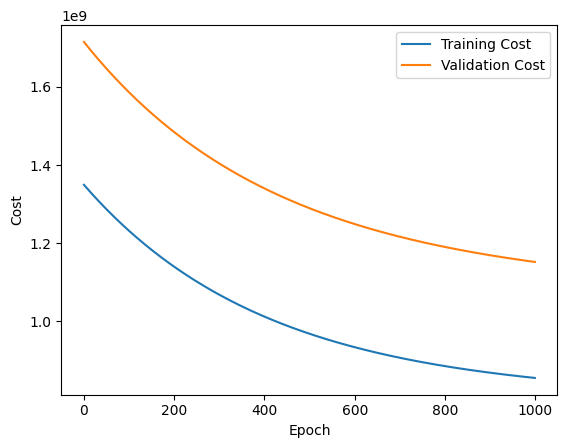

Test Error: 15864.4907


In [19]:
# Plot cost history
plt.plot(range(num_epochs), train_cost_history, label="Training Cost")
plt.plot(range(num_epochs), valid_cost_history, label="Validation Cost")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Evaluate on test data
test_predictions = predict(X_test, weights, bias)
test_error = np.mean(np.abs(test_predictions - Y_test))
print(f"Test Error: {test_error:.4f}")